In [31]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
data = pd.read_hdf('./data/all_of_them_clean.h5')

In [4]:
data.head()

,kadencja,partia,osoba,glos,nr_posiedzenia,nr_glos,opis,timestamp
0,7.0,PO,Achinger Elżbieta,Nieobecny,102.0,1.0,102 posiedzenie Sejmu Rzeczypospolitej Polskie...,2015-10-08 09:06:44
1,7.0,PO,Arkit Tadeusz,Przeciw,102.0,1.0,102 posiedzenie Sejmu Rzeczypospolitej Polskie...,2015-10-08 09:06:44
2,7.0,PO,Arłukowicz Bartosz,Przeciw,102.0,1.0,102 posiedzenie Sejmu Rzeczypospolitej Polskie...,2015-10-08 09:06:44
3,7.0,PO,Arndt Paweł,Przeciw,102.0,1.0,102 posiedzenie Sejmu Rzeczypospolitej Polskie...,2015-10-08 09:06:44
4,7.0,PO,Augustyn Urszula,Przeciw,102.0,1.0,102 posiedzenie Sejmu Rzeczypospolitej Polskie...,2015-10-08 09:06:44


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6614370 entries, 0 to 6614369
Data columns (total 8 columns):
kadencja          float64
partia            object
osoba             object
glos              object
nr_posiedzenia    float64
nr_glos           float64
opis              object
timestamp         datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 454.2+ MB


In [6]:
data['opis'][0]

'102 posiedzenie Sejmu Rzeczypospolitej Polskiej w dniach 8 i 9 października 2015 r. - głosowanie nad przyjęciem wniosku o uzupełnienie porządku dziennego o punkt obejmujący informację prezesa Rady Ministrów w sprawie niebezpieczeństw dla państwa polskiego wynikających z procesu prywatyzacji spółki PKP Energetyka SA'

In [7]:
data['glos'].unique()

array(['Nieobecny', 'Przeciw', 'Za', 'Wstrzymał się'], dtype=object)

In [8]:
vote_cat = {
    'Nieobecny':0,
    'Przeciw':-1,
    'Za':2,
    'Wstrzymał się':1
}


In [9]:
data['partia'].unique()

array(['PO', 'PiS', 'PSL', 'SLD', 'niez.', 'ZP', 'RP', 'BC', 'KPSP', 'TR',
       'BiG', 'SP', 'ID', 'PO-KO', 'PSL-KP', 'Kukiz15', 'Konfederacja',
       'UPR', 'PP', 'TERAZ!', 'WiS', 'PSL-UED', 'N', 'W-S', 'L-S', 'UED',
       'Republikanie', 'ED', 'KO', 'Lewica', 'PSL-Kukiz15'], dtype=object)

In [10]:
group_cat = {
    'PO':0, 'PiS':1, 'PSL':2, 'SLD':3, 'niez.':4, 'ZP':5, 'RP':6, 'BC':7, 'KPSP':8, 'TR':9,
       'BiG':10, 'SP':11, 'ID':12, 'PO-KO':12, 'PSL-KP':13, 'Kukiz15':14, 'Konfederacja':15,
       'UPR':16, 'PP':17, 'TERAZ!':18, 'WiS':19, 'PSL-UED':20, 'N':21, 'W-S':22, 'L-S':23, 'UED':24,
       'Republikanie':25, 'ED':26, 'KO':27, 'Lewica':28, 'PSL-Kukiz15':29
}

In [11]:
data['partia_cat']=data['partia'].apply(lambda x: group_cat[x])

In [12]:
data['vote_cat']= data['glos'].apply(lambda x: vote_cat[x])

In [13]:
data['nr_posiedzenia'] = data['nr_posiedzenia'].astype('int64')

In [14]:
data_np102 = data[data['nr_posiedzenia']==102]

In [15]:
data_np102.head()

,kadencja,partia,osoba,glos,nr_posiedzenia,nr_glos,opis,timestamp,partia_cat,vote_cat
0,7.0,PO,Achinger Elżbieta,Nieobecny,102,1.0,102 posiedzenie Sejmu Rzeczypospolitej Polskie...,2015-10-08 09:06:44,0,0
1,7.0,PO,Arkit Tadeusz,Przeciw,102,1.0,102 posiedzenie Sejmu Rzeczypospolitej Polskie...,2015-10-08 09:06:44,0,-1
2,7.0,PO,Arłukowicz Bartosz,Przeciw,102,1.0,102 posiedzenie Sejmu Rzeczypospolitej Polskie...,2015-10-08 09:06:44,0,-1
3,7.0,PO,Arndt Paweł,Przeciw,102,1.0,102 posiedzenie Sejmu Rzeczypospolitej Polskie...,2015-10-08 09:06:44,0,-1
4,7.0,PO,Augustyn Urszula,Przeciw,102,1.0,102 posiedzenie Sejmu Rzeczypospolitej Polskie...,2015-10-08 09:06:44,0,-1


In [16]:
d_g = data_np102[['partia','nr_glos','vote_cat']].groupby(['partia','nr_glos'])

In [28]:
group_col = 'partia'

In [35]:
g = data_np102[data_np102['nr_glos']==39][[group_col,'vote_cat']].groupby(group_col)

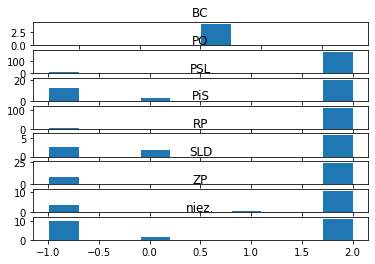

In [56]:
num_groups = g.ngroups

fig, axes = plt.subplots(num_groups)

for i, (k, group) in enumerate(g):
    ax = axes[i]
    ax.set_title(k)
    group = group[[c for c in group.columns if c != group_col]]
    num_columns = len(group.columns)
    ax.hist(group.values, 10, histtype='bar',
            label=list(group.columns),
             edgecolor='white')
    #ax.legend()

plt.show()

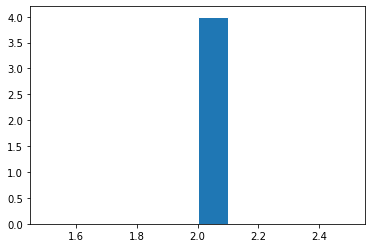

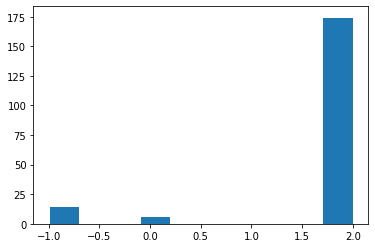

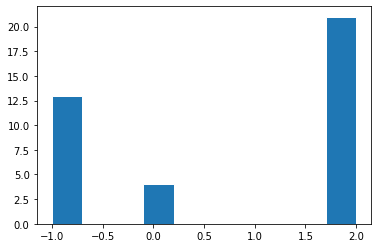

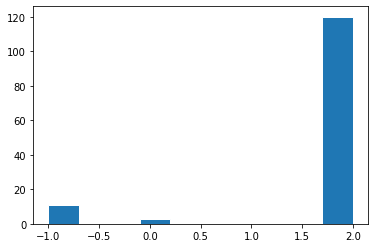

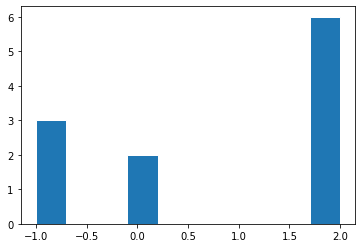

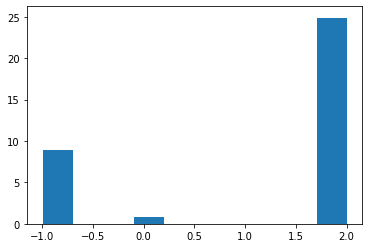

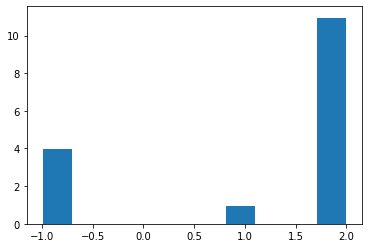

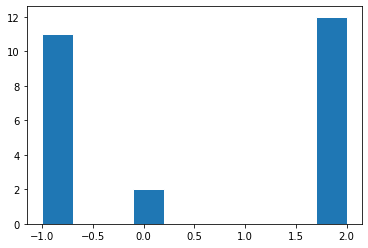

In [63]:
for i, (k, group) in enumerate(g):
   
    group = group[[c for c in group.columns if c != group_col]]
    num_columns = len(group.columns)
    plt.hist(group.values, 10, histtype='bar',`
            label=list(group.columns),
             edgecolor='white', )
    plt.show()

In [23]:
data.groupby('nr_posiedzenia').sum()

,kadencja,nr_glos,vote_cat
nr_posiedzenia,,,
1,622268.0,2448494.0,72733
2,109940.0,200560.0,13655
3,127853.0,204977.0,10980
4,69432.0,51050.0,5724
5,263712.0,688178.0,21519
6,310008.0,1262690.0,38080
7,923220.0,10731800.0,32800
8,108100.0,156400.0,5608
9,215740.0,1047880.0,17808
